WEEK 1

Task 1

In [153]:
import pandas as pd
import numpy as np

In [155]:
df = pd.read_csv(r'C:\Users\PC\Downloads\ObesityDataSetHubbleMind.csv')
print(df)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [157]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool


In [159]:
print(df.duplicated().sum())

24


In [163]:
df_backup = df.copy()

In [165]:
df = df.drop_duplicates()

In [167]:
print(df.duplicated().sum()) 

0


In [169]:
print(df)

      Gender        Age    Height      Weight family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                            yes   
1          0  21.000000  1.520000   56.000000                            yes   
2          1  23.000000  1.800000   77.000000                            yes   
3          1  27.000000  1.800000   87.000000                             no   
4          1  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106       0  20.976842  1.710730  131.408528                            yes   
2107       0  21.982942  1.748584  133.742943                            yes   
2108       0  22.524036  1.752206  133.689352                            yes   
2109       0  24.361936  1.739450  133.346641                            yes   
2110       0  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC  SMOKE 

TASK 2-DATA TYPE AND ENCODING

In [171]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['SMOKE'] = le.fit_transform(df['SMOKE'])

print(df)

      Gender        Age    Height      Weight family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                            yes   
1          0  21.000000  1.520000   56.000000                            yes   
2          1  23.000000  1.800000   77.000000                            yes   
3          1  27.000000  1.800000   87.000000                             no   
4          1  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106       0  20.976842  1.710730  131.408528                            yes   
2107       0  21.982942  1.748584  133.742943                            yes   
2108       0  22.524036  1.752206  133.689352                            yes   
2109       0  24.361936  1.739450  133.346641                            yes   
2110       0  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC  SMOKE 

In [181]:
print(df.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [183]:
import pandas as pd

df = pd.read_csv(r'C:\Users\PC\Downloads\ObesityDataSetHubbleMind.csv')

print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [185]:
df_backup = df.copy()

In [187]:
df = df.drop_duplicates()


In [189]:
# If 'MTRANS' and 'NObeyesdad' exist, proceed with one-hot encoding
df = pd.get_dummies(df, columns=['MTRANS', 'NObeyesdad'])

print(df)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

TASK 3- Outlier Detection and Handling

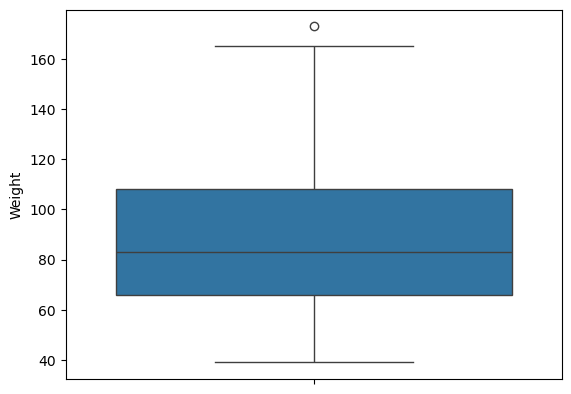

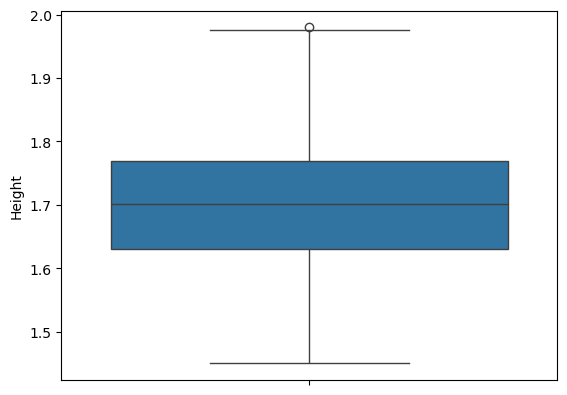

In [192]:
#Detect outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Weight
sns.boxplot(df['Weight'])
plt.show()

# Boxplot for Height
sns.boxplot(df['Height'])
plt.show()


In [193]:
print(df['Weight'].describe())


count    2087.000000
mean       86.858730
std        26.190847
min        39.000000
25%        66.000000
50%        83.101100
75%       108.015907
max       173.000000
Name: Weight, dtype: float64


In [195]:
#Handle Outliers
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)

#Cap Outliers
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Q1: 66.0, Q3: 108.015907, IQR: 42.015907
Lower Bound: 2.976139500000002, Upper Bound: 171.03976749999998


In [198]:
print(df['Weight'].min(), df['Weight'].max())


39.0 173.0


In [200]:

df['Weight'] = df['Weight'].clip(upper=upper_bound)

print(df['Weight'].max())


171.03976749999998


In [202]:
# Filter out rows with outliers
df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]

print(df.shape)


(2087, 27)


In [204]:
import numpy as np

# Apply log transformation to Weight
df['Weight'] = np.log1p(df['Weight'])

# Check transformed values
print(df['Weight'].describe())


count    2087.000000
mean        4.428934
std         0.311695
min         3.688879
25%         4.204693
50%         4.432020
75%         4.691494
max         5.147726
Name: Weight, dtype: float64


In [206]:
# Apply square root transformation
df['Weight'] = np.sqrt(df['Weight'])


In [208]:
# Replace outliers with median
median_weight = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]['Weight'].median()

df['Weight'] = df['Weight'].apply(lambda x: median_weight if x > upper_bound else x)

# Check the updated values
print(df['Weight'].describe())


count    2087.000000
mean        2.103182
std         0.074566
min         1.920646
25%         2.050535
50%         2.105236
75%         2.165986
max         2.268860
Name: Weight, dtype: float64


In [210]:
#Handle Outliers
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)

#Cap Outliers
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Q1: 2.050534715480566, Q3: 2.165985643270322, IQR: 0.11545092778975574
Lower Bound: 1.8773583237959326, Upper Bound: 2.3391620349549553


In [212]:
print(df['Weight'].min(), df['Weight'].max())


1.9206455826398414 2.268859990498471


TASK 4- Normalization and Standardization

In [215]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize Age, Weight, Height
df[['Age', 'Weight', 'Height']] = scaler.fit_transform(df[['Age', 'Weight', 'Height']])
print(df[['Age', 'Weight', 'Height']].head())

        Age    Weight    Height
0  0.148936  0.351755  0.320755
1  0.148936  0.258715  0.132075
2  0.191489  0.478520  0.660377
3  0.276596  0.560937  0.660377
4  0.170213  0.582155  0.622642


In [217]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Standardize Age, Weight, Height
df[['Age', 'Weight', 'Height']] = scaler.fit_transform(df[['Age', 'Weight', 'Height']])
print(df[['Age', 'Weight', 'Height']].head())


        Age    Weight    Height
0 -0.526613 -0.805527 -0.887408
1 -0.526613 -1.240115 -1.960788
2 -0.212507 -0.213410  1.044677
3  0.415705  0.171559  1.044677
4 -0.369560  0.270670  0.830001


WEEK 2 - EXPLORATORY DATA ANALYSIS

TASK 1: Summary Statistics

In [221]:
# Remove duplicates consistently
df_backup = df.copy()


In [223]:
df = df.drop_duplicates()


In [225]:
#Summary statistics
import pandas as pd
df = pd.read_csv(r'C:\Users\PC\Downloads\ObesityDataSetHubbleMind.csv')
print(df[['Age', 'Weight', 'Height']].describe())
print(df['NObeyesdad'].value_counts())



               Age       Weight       Height
count  2111.000000  2111.000000  2111.000000
mean     24.312600    86.586058     1.701677
std       6.345968    26.191172     0.093305
min      14.000000    39.000000     1.450000
25%      19.947192    65.473343     1.630000
50%      22.777890    83.000000     1.700499
75%      26.000000   107.430682     1.768464
max      61.000000   173.000000     1.980000
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [227]:
print(f"Mean Age: {df['Age'].mean()}, Median Age: {df['Age'].median()}, Mode Age: {df['Age'].mode()[0]}")

Mean Age: 24.312599908574136, Median Age: 22.77789, Mode Age: 18.0


TASK 2- Distribution Analysis

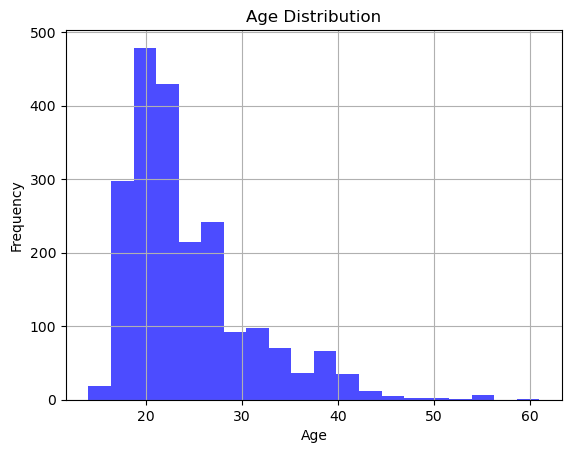

In [230]:
import matplotlib.pyplot as plt 

#histogram for Age distribution
df['Age'].hist(bins=20, alpha=0.7, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.show() 





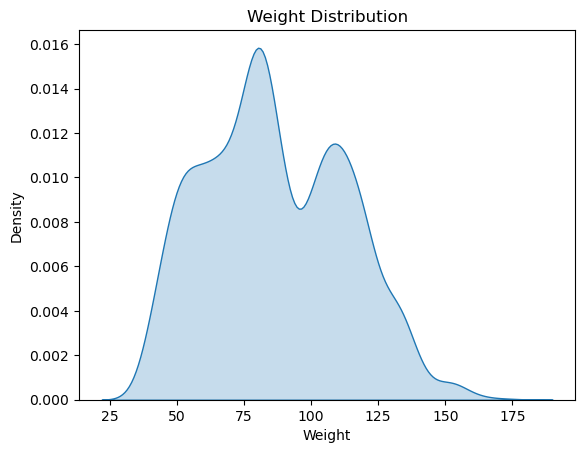

In [232]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# KDE plot for Weight distribution
sns.kdeplot(df['Weight'], fill=True)
plt.title('Weight Distribution')
plt.show()


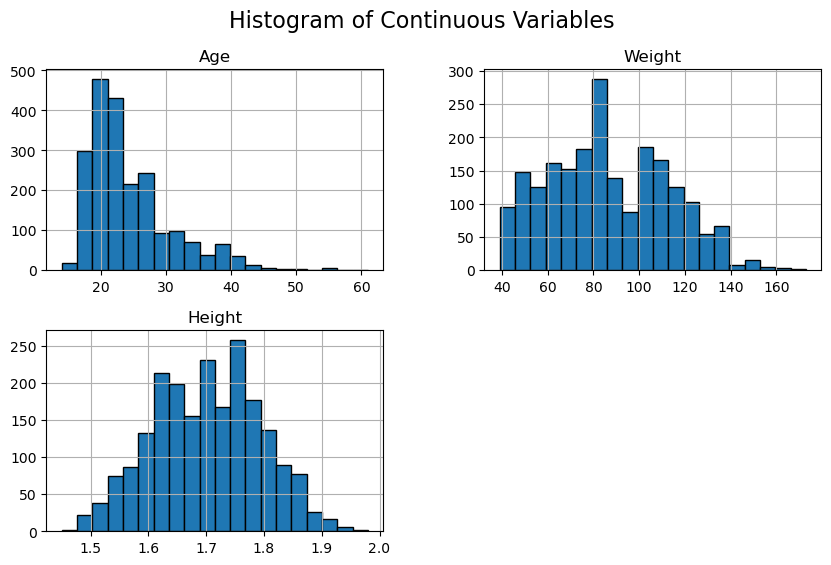

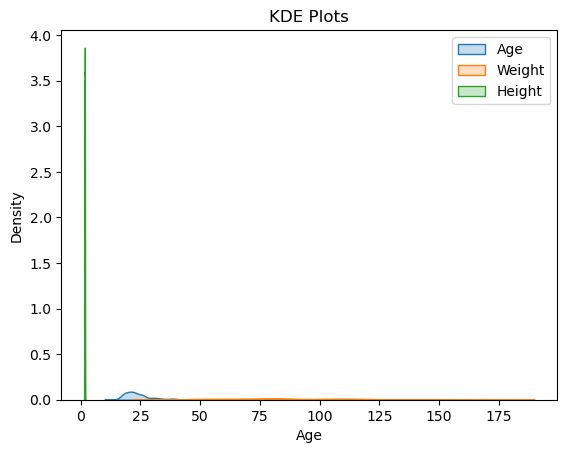

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['Age', 'Weight', 'Height']].hist(bins=20, figsize=(10, 6), edgecolor='black')
plt.suptitle('Histogram of Continuous Variables', size=16)
plt.show()

for col in ['Age', 'Weight', 'Height']:
    sns.kdeplot(df[col], fill=True, label=col)
plt.title('KDE Plots')
plt.legend()
plt.show()


TASK 3 - Relationship Exploration

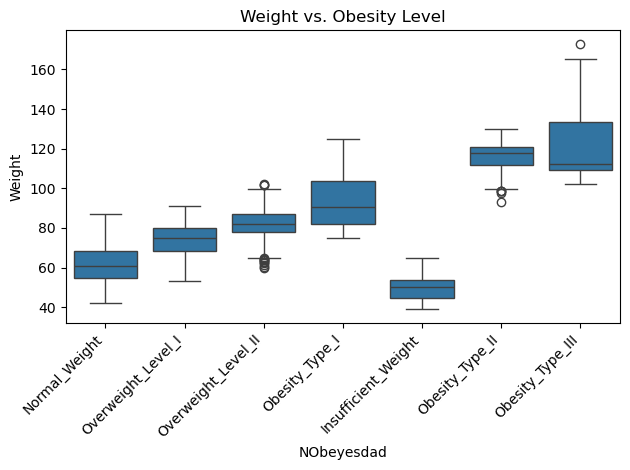

In [236]:
sns.boxplot(x='NObeyesdad', y='Weight', data=df)
plt.title('Weight vs. Obesity Level')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


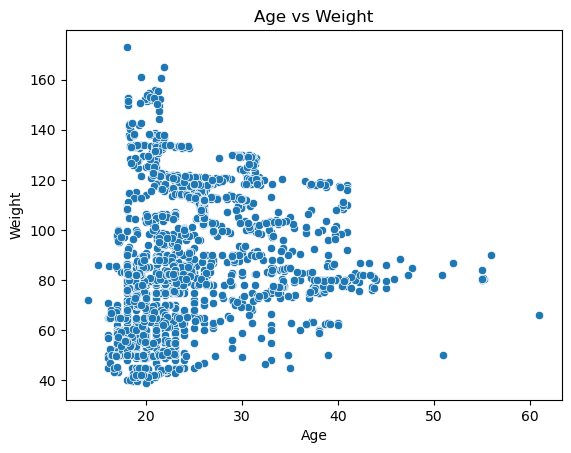

In [238]:
sns.scatterplot(x='Age', y='Weight', data=df)
plt.title('Age vs Weight')
plt.show()


TASK 4- Correlation Analysis

Correlation Matrix:
             Age    Weight    Height
Age     1.000000  0.202560 -0.025958
Weight  0.202560  1.000000  0.463136
Height -0.025958  0.463136  1.000000


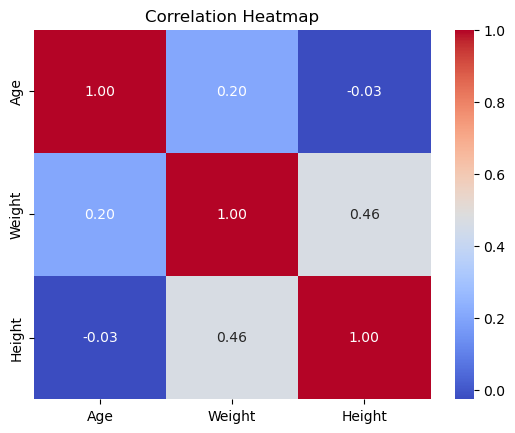

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\PC\Downloads\ObesityDataSetHubbleMind.csv')

# Calculate the Correlation Matrix
correlation_matrix = df[['Age', 'Weight', 'Height']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap Visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


WEEK 3- ADVANCED VISUALIZATIONS AND MACHINE LEARNING

TASK 1: Advanced Visualization

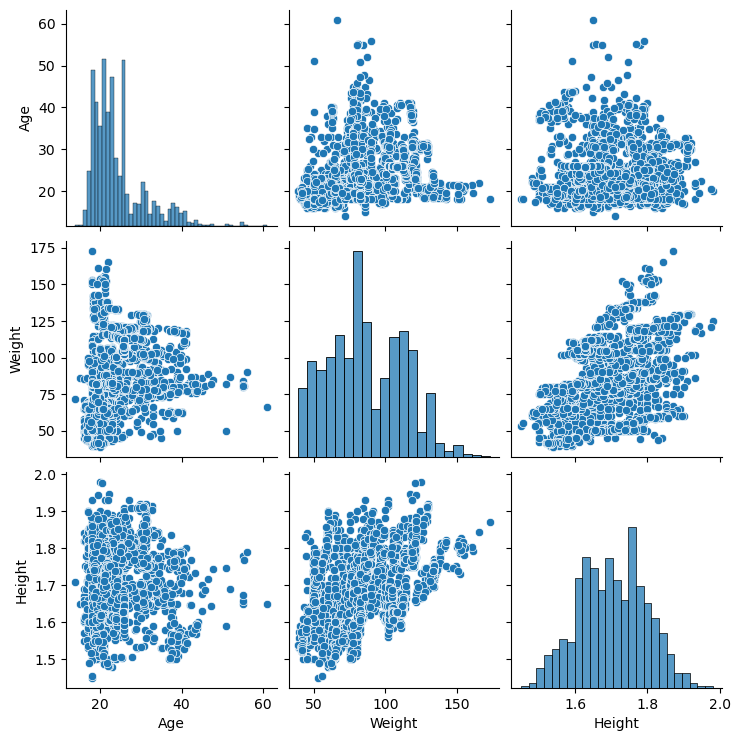

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Age', 'Weight', 'Height']]) 
plt.show()


In [251]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [254]:
print(X.dtypes)


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object


In [256]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Label Encoding to the 'Gender' column
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

# One-Hot Encoding to categorical features
X_train = pd.get_dummies(X_train, drop_first=True)  # Avoid dummy variable trap
X_test = pd.get_dummies(X_test, drop_first=True)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

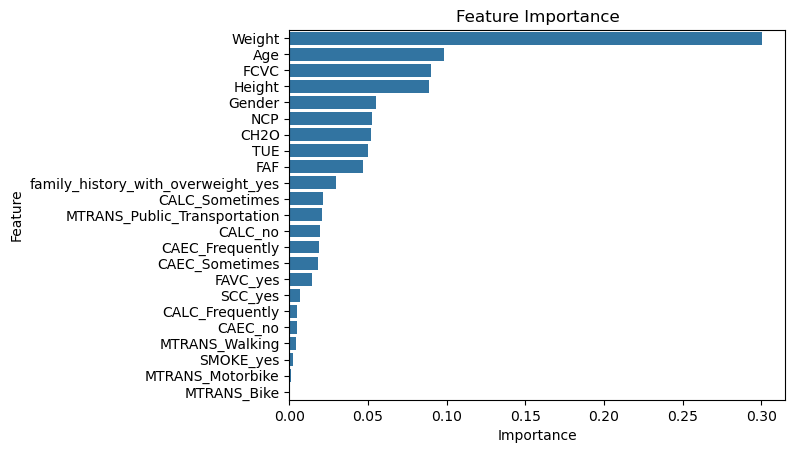

In [257]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier()
rf.fit(X_train, y_train)  

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


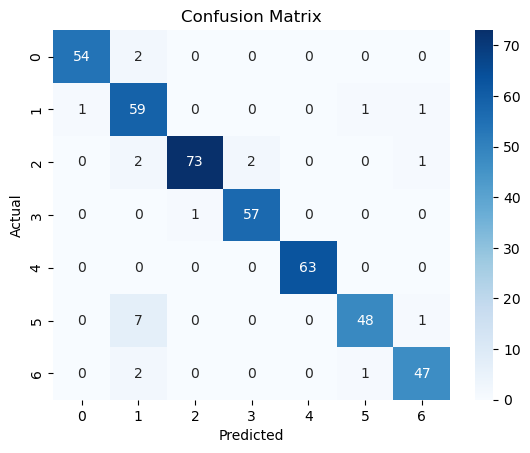

In [259]:
#Heatmap of confusion matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# predictions using the fitted model
y_pred = rf.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

#confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


TASK 2- Feature Engineering and Scaling

In [265]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_encoded = pd.get_dummies(X, drop_first=True)  

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)


In [267]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', 'passthrough', categorical_cols)  
    ])

X_scaled = preprocessor.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols.tolist() + categorical_cols.tolist())


In [269]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = {
    'Age': [25, 32, 47, 19],        
    'Gender': ['Male', 'Female', 'Female', 'Male'], 
    'Income': [50000, 60000, 75000, 40000]  
}

X = pd.DataFrame(data)

X_encoded = pd.get_dummies(X, drop_first=True)  

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print("Original DataFrame:\n", X)
print("\nEncoded DataFrame:\n", X_encoded)
print("\nScaled DataFrame:\n", X_scaled_df)


Original DataFrame:
    Age  Gender  Income
0   25    Male   50000
1   32  Female   60000
2   47  Female   75000
3   19    Male   40000

Encoded DataFrame:
    Age  Income  Gender_Male
0   25   50000         True
1   32   60000        False
2   47   75000        False
3   19   40000         True

Scaled DataFrame:
         Age    Income  Gender_Male
0 -0.550277 -0.483368          1.0
1  0.119625  0.290021         -1.0
2  1.555131  1.450105         -1.0
3 -1.124479 -1.256757          1.0


In [275]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'C:\Users\PC\Downloads\ObesityDataSetHubbleMind.csv')

scaler = StandardScaler()

df[['Age', 'Weight', 'Height']] = scaler.fit_transform(df[['Age', 'Weight', 'Height']])



In [277]:
print(df.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [293]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Age'] = label_encoder.fit_transform(df['Age'])
df['Weight'] = label_encoder.fit_transform(df['Weight'])
df['Height'] = label_encoder.fit_transform(df['Height'])

print(df[['Age', 'Weight', 'Height']].head())


    Age  Weight  Height
0   404     245     295
1   404     173      28
2   701     382    1306
3  1021     643    1306
4   578     692    1202


In [307]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Weight', 'Height']] = scaler.fit_transform(df[['Age', 'Weight', 'Height']])

print(df[['Age', 'Weight', 'Height']].head())


        Age    Weight    Height
0  0.288365  0.160761  0.187540
1  0.288365  0.113517  0.017800
2  0.500357  0.250656  0.830261
3  0.728765  0.421916  0.830261
4  0.412562  0.454068  0.764145


TASK 3- Train-Test Split

In [299]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df[['Age', 'Weight', 'Height']] 
y = df['NObeyesdad']  

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TASK 4: Machine Learning Model Implementation

In [301]:
from sklearn.linear_model import LogisticRegression

# Using Logistics Regression model

lr = LogisticRegression(max_iter=350)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [303]:
from sklearn.ensemble import RandomForestClassifier

# Using Random Forest model
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


TASK 5: Model Evaluation

In [305]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluating Logistic Regression model
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted')}")

# Evaluating Random Forest model
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")


Logistic Regression:
Accuracy: 0.6973995271867612
Precision: 0.6896699710386683
Recall: 0.6973995271867612
F1 Score: 0.6835882164539695

Random Forest:
Accuracy: 0.9645390070921985
Precision: 0.96498263642729
Recall: 0.9645390070921985
F1 Score: 0.9644996873743822


In [57]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.87      0.94      0.90        62
     Obesity_Type_I       0.99      0.94      0.96        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.88      0.89        56
Overweight_Level_II       0.92      0.94      0.93        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



WEEK 4 - MODEL EVALUATION AND REPORTING

TASK 1: Model Evaluation Report

In [295]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [296]:
# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Precision, Recall, F1-Score
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')  # Adjust 'average' based on your task
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Classification Report
report_lr = classification_report(y_test, y_pred_lr)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)


In [297]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1-Score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Adjust 'average' based on your task
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Classification Report
report_rf = classification_report(y_test, y_pred_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


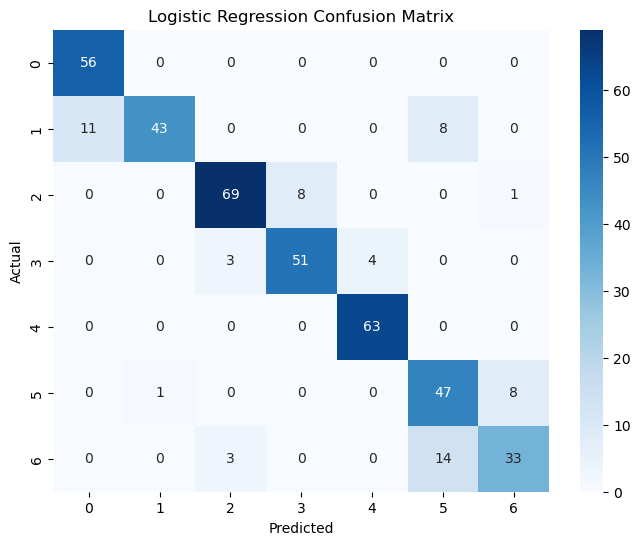

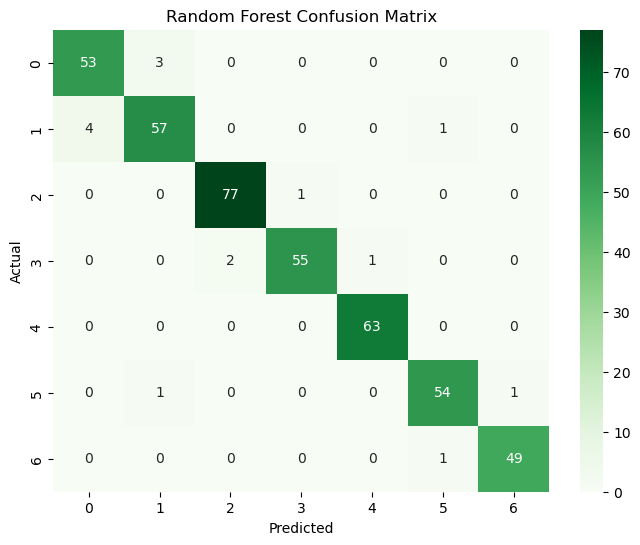

In [298]:
# Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [299]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-Score: {f1_lr}")
print("\nClassification Report:\n", report_lr)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print("\nClassification Report:\n", report_rf)


Logistic Regression Metrics:
Accuracy: 0.8557919621749409
Precision: 0.8651582039068493
Recall: 0.8557919621749409
F1-Score: 0.8540281421528486

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.98      0.69      0.81        62
           2       0.92      0.88      0.90        78
           3       0.86      0.88      0.87        58
           4       0.94      1.00      0.97        63
           5       0.68      0.84      0.75        56
           6       0.79      0.66      0.72        50

    accuracy                           0.86       423
   macro avg       0.86      0.85      0.85       423
weighted avg       0.87      0.86      0.85       423


Random Forest Metrics:
Accuracy: 0.9645390070921985
Precision: 0.964562243116044
Recall: 0.9645390070921985
F1-Score: 0.9644746844306784

Classification Report:
               precision    recall  f1-score   support

           0    

Model Evaluation Report

1. Overview
    The objective of this task was to evaluate the performance of two classification models: Logistic Regression and Random Forest.
    Both models were trained on the dataset to predict obesity levels.
    Key metrics evaluated include Accuracy, Precision, Recall, and F1-score.
    
    Key Metrics Meaning

    Accuracy: How often the model gets things right.

    Precision: How trustworthy the predictions are for each obesity level.


   Recall: How well the model captures all true cases for each obesity level.

   F1-Score: A balance between precision and recall.

3. Performance of the Models

   #Logistic Regression:


       Logistic Regression is like a straight-line tool—it works best when relationships between data points are simple and clear.
        
   Overall Performance

   Accuracy: 85.58%

   Precision: 86.52%        

   Recall: 85.58%
     
   F1-Score: 85.40%
     
   Class-wise Metrics: Logistic Regression performed well across most classes but showed some variability:
    
   Class 0 and 4 had the highest performance, with F1-scores of 91% and 97%, respectively.

   Class 5 showed lower performance, with an F1-score of 75%, indicating challenges in distinguishing this class.

   Class 6 also showed lower recall (66%), which suggests misclassification or underrepresentation.
    
   Insights: Logistic Regression is effective for balanced classes but struggles with underrepresented or overlapping class features.
    
   #Random Forest

       Random Forest is like a team of decision trees working together. It’s good at handling complicated data and finding patterns.
    
   Overall Performance:


   Accuracy: 96.45%

   Precision: 96.46%


   Recall: 96.45%


   F1-Score: 96.45%
    
    Class-wise Metrics: Random Forest demonstrated consistent and robust performance across all classes:
    
   All classes had F1-scores above 93%.

   
   Class 4 had an F1-score of 99%, showcasing near-perfect classification.


   Slightly lower performance for Class 1 (93% F1-score) suggests some room for improvement but remains very high.

   Insights: Random Forest outperformed Logistic Regression, likely due to its ability to handle complex, nonlinear relationships and feature importance.


3. Confusion Matrix Insights
   
    Logistic Regression:

       Strength: Few errors for Classes 0 and 4.
   Weakness: Struggled with Classes 5 and 6, leading to more wrong predictions.




   Random Forest:

       Strength: Very few errors across all classes.
   Weakness: Only minor issues in Class 1, but nothing significant.





5. Comparison and Recommendation:
   
    Based on the evaluation:
    Random Forest is the better model because it delivers higher accuracy and consistently performs well across all obesity levels.
    Logistic Regression is simpler and faster, but it’s not as reliable for complex problems like this.



TASK 2: REPORT DOCUMENTATION


Project Report
1. Introduction

    The objective of this project was to classify obesity levels using two machine learning models: Logistic Regression and Random Forest. These models     were evaluated to determine their effectiveness in accurately predicting class labels based on the dataset. The classification task was conducted to  provide actionable insights and identify the optimal model for deployment.

2. Dataset Description

    The dataset consists of features related to obesity levels, such as dietary habits, physical activities, and demographic information. Key aspects       of the dataset include:

    Number of observations: 423

    Number of features: Several features, including target labels representing obesity classes.
    Target variable: Obesity levels, categorized into multiple classes (0–6).
    Key features include:

    Age: Age of individuals in years.

    Physical activity levels: Indicators of exercise frequency.

    Dietary habits: Represented by various input variables.

3. Data Preprocessing
    To prepare the dataset for analysis, the following preprocessing steps were conducted:

    Handling Missing Data: Checked for missing values and imputed appropriately.
    Encoding Categorical Variables: Converted categorical data into numerical formats using one-hot encoding.
    Feature Scaling: Applied normalization to ensure all features were on the same scale.
    Data Splitting: Divided the dataset into training (80%) and testing (20%) subsets for unbiased evaluation.

4. Exploratory Data Analysis (EDA)
    EDA was performed to understand the underlying patterns and distributions in the dataset:

    Distribution of Classes: The target variable showed class imbalance, with some classes (e.g., Class 5) being underrepresented.
    Feature Correlation: Strong correlations were observed between physical activity levels and obesity classes.
    Anomalies: Identified potential outliers in dietary habits, which were addressed during preprocessing.

Key Visualizations:

    Histograms for feature distributions.
    Heatmap for correlation between features.

5. Model Building
   
    Two models were selected for evaluation:

    Logistic Regression:
    Chosen for its simplicity and interpretability.
    Served as a baseline model.

    Random Forest:
    Selected for its robustness and ability to handle non-linear relationships.
    Implementation: Models were built using Python’s scikit-learn library.

6. Model Evaluation
    The models were evaluated based on Accuracy, Precision, Recall, and F1-score. Below is a summary of the results:

Logistic Regression:

    Accuracy: 85.58%
    
    Precision: 86.52%
    
    Recall: 85.58%
    
    F1-Score: 85.40%

    Class-wise performance:
    Strong performance for Classes 0 and 4 (F1-scores of 91% and 97%, respectively).
    Lower performance for Class 5 (F1-score: 75%) and Class 6 (Recall: 66%).

    
 Random Forest:
 
    Accuracy: 96.45%
    
    Precision: 96.46%
    
    Recall: 96.45%
    
    F1-Score: 96.45%
    
    Class-wise performance: 
    
    Random Forest demonstrated consistent and robust performance across all classes:

    All classes had F1-scores above 93%.
    
    Class 4 had an F1-score of 99%, showcasing near-perfect classification.
    
    Slightly lower performance for Class 1 (93% F1-score) suggests some room for improvement but remains very high.

7. Insights and Recommendations
    Insights: Random Forest outperformed Logistic Regression, likely due to its ability to handle complex, nonlinear relationships and feature importance.

8. Recommendations:
    Based on the evaluation, Random Forest is the better model because it delivers higher accuracy and consistently performs well across all obesity levels.
    Logistic Regression is simpler and faster, but it’s not as reliable for complex problems like this. Therefore, deploy the Random Forest model for production due to its superior accuracy and robustness.

9. Visualizations
 Confusion Matrices:
 Heatmaps of confusion matrices for both models illustrate their prediction performance.

    Logistic Regression:

     Strength: Few errors for Classes 0 and 4.

    Weakness: Struggled with Classes 5 and 6, leading to more wrong predictions.

    Random Forest:

     Strength: Very few errors across all classes.
 
     Weakness: Only minor issues in Class 1, but nothing significant.

10. Conclusion:
    
    This project successfully demonstrated the classification of obesity levels using machine learning models. The Random Forest model emerged as the best performer, achieving an accuracy of 96.45% and consistent class-wise performance.
